In [67]:
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(True)
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 

df = pd.read_csv('/content/TCS.NSE.csv')



In [68]:
df1 = df['Close']
df1.shape

(1666,)

In [69]:
x = df1.isnull()
for i in range(0,1666):
  if x[i]:
    df.iloc[i] = df.iloc[i+1]
df1 = pd.DataFrame(df1)

In [70]:
test_set = df['Close'].iloc[1332:1666]


Text(0, 0.5, 'Rupees')

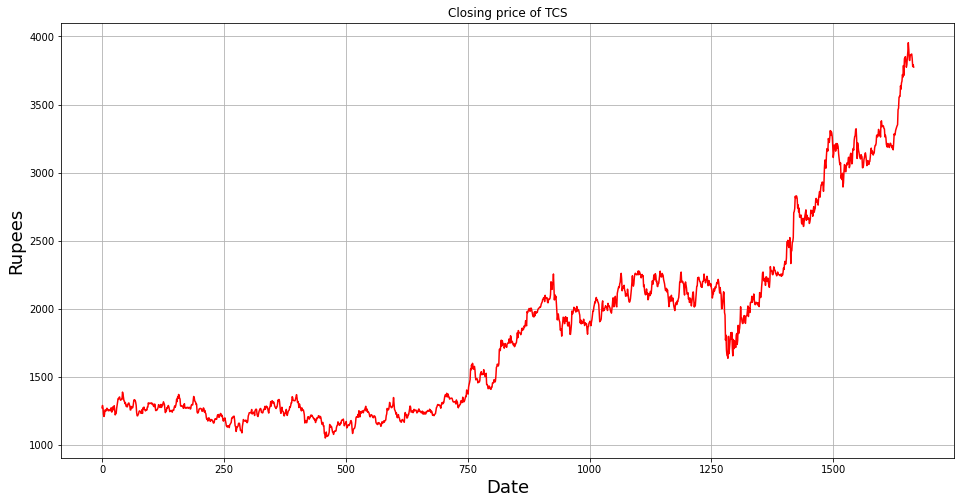

In [71]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], 'red')
plt.grid()
plt.title('Closing price of TCS')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Rupees', fontsize = 18)

In [72]:
scaler=MinMaxScaler(feature_range=(-1,1))
df2 = scaler.fit_transform(np.array(df1).reshape(-1,1))

df2.shape

(1666, 1)

In [73]:
training_size=int(len(df2)*0.80)
test_size=len(df2)-training_size
test_data = df2[training_size:len(df2)]
train_data = df2[0:training_size]
train_data.shape

(1332, 1)

In [74]:
import numpy
def create_dataset(dataset, time_step=10):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [75]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [76]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [77]:
model = keras.Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer=(tf.keras.optimizers.Adam(lr = 0.01)))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [78]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
42/42 [==============================] - 6s 14ms/step - loss: 0.1222
Epoch 2/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0027
Epoch 3/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 5/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 6/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 7/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 8/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 9/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 10/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 11/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 12/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 13/100
42/42 [=====

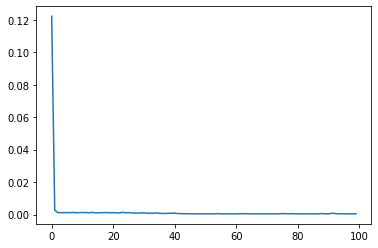

In [79]:
plt.plot(history.history['loss'])


In [80]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [81]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [82]:
test_range = np.arange(1332,1660)

Text(0, 0.5, 'Rupees')

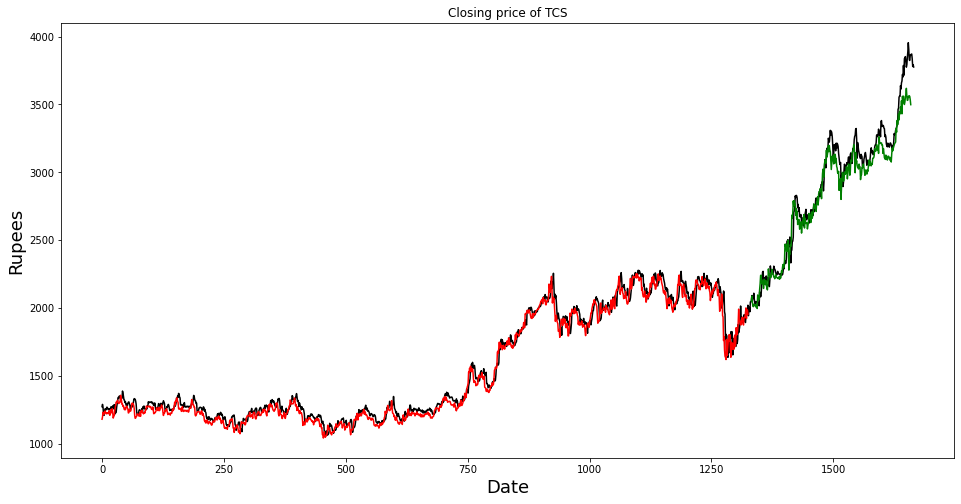

In [83]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], 'black')
plt.plot(train_predict, 'red')
plt.plot( test_range, test_predict, 'g')
plt.title('Closing price of TCS')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Rupees', fontsize = 18)